## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve, auc

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('medical_dataset.csv')

## Exploratory Data Analysis

In [4]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [5]:
df.shape

(4920, 133)

In [6]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [8]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [9]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [10]:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

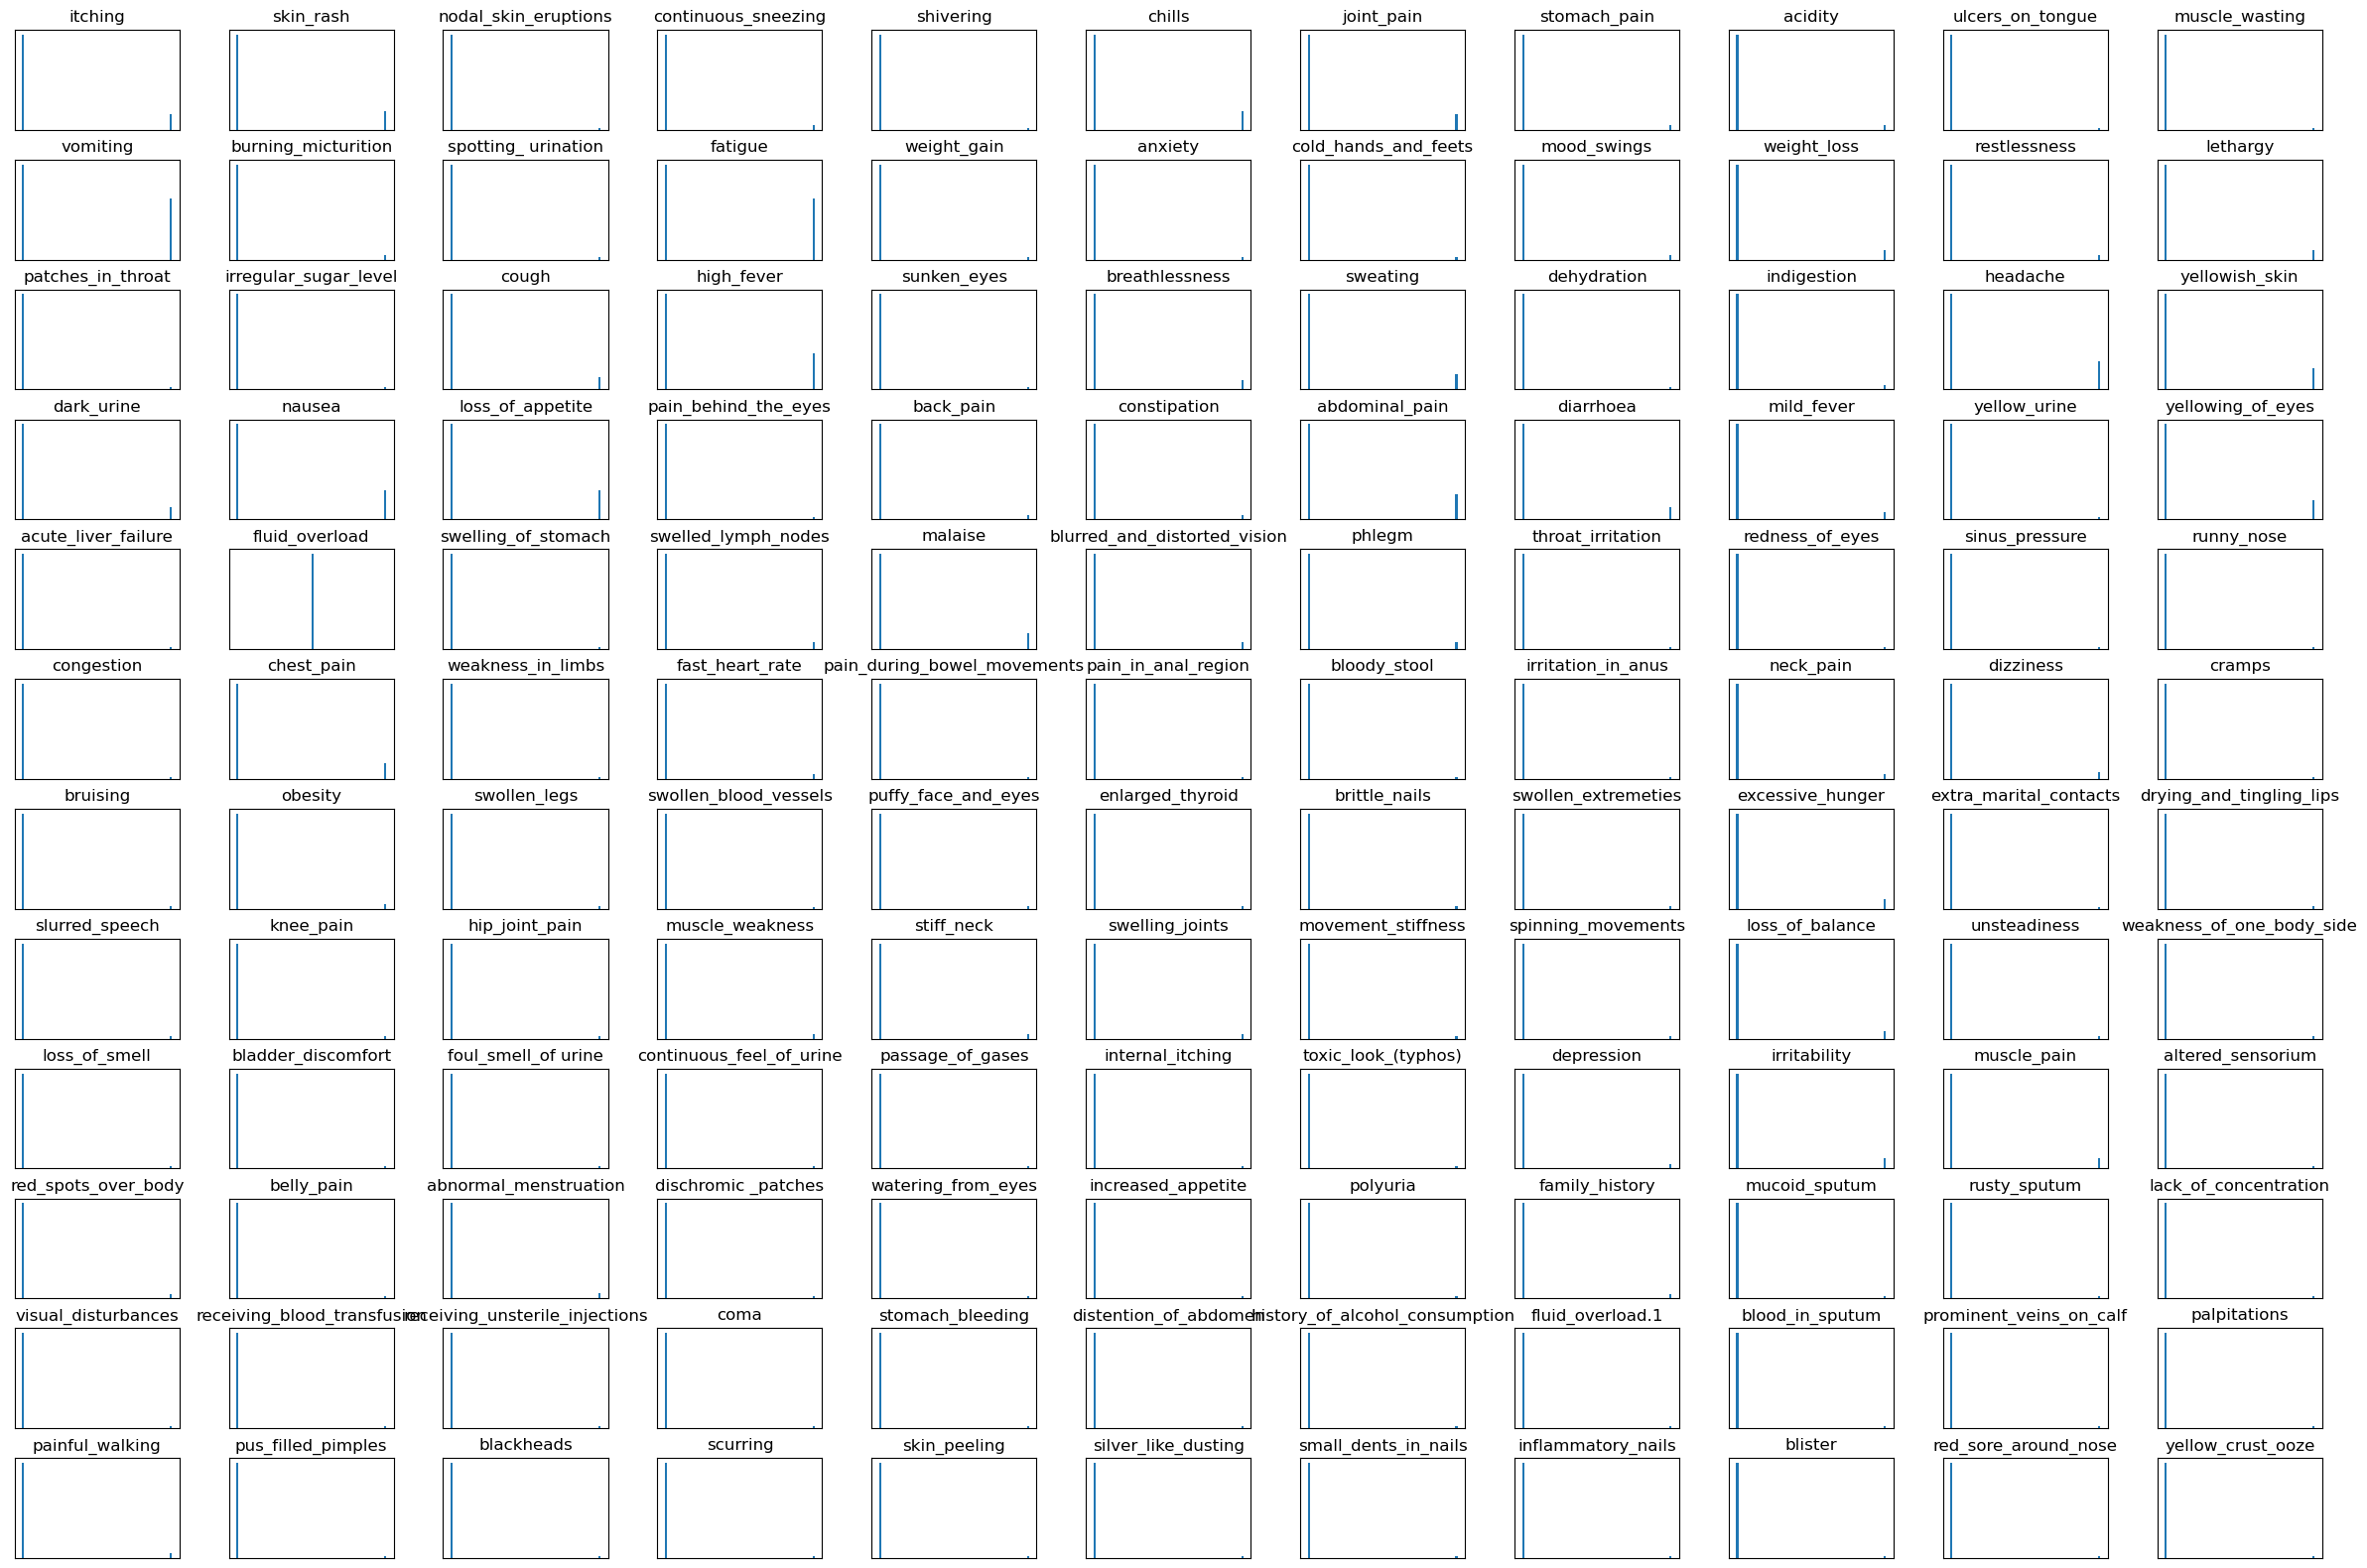

In [11]:
# a histogram plot of all the possible symptoms
ax = df.hist(bins=70, figsize=(30, 20))

for axis in ax.flatten():
    axis.xaxis.set_visible(False)  # Hide x-axis
    axis.yaxis.set_visible(False)  # Hide y-axis

plt.show()

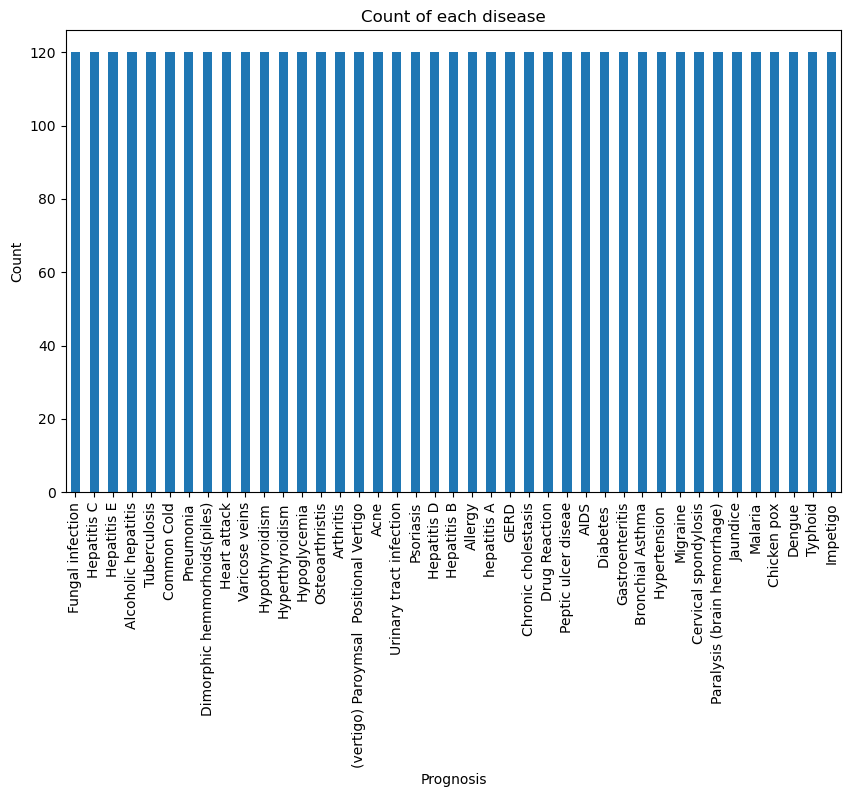

In [12]:
# Plot the frequency of each class

classes = df['prognosis'].value_counts()
classes.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Prognosis')
plt.ylabel('Count')

plt.title('Count of each disease')
plt.show()

In [13]:
#checking for null values
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [14]:
#label encoding the values of prognosis column

label_encoder= LabelEncoder()
df['prognosis'] = label_encoder.fit_transform(df['prognosis'])

In [15]:
df['prognosis'].unique()

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27])

In [16]:
len(df['prognosis'].unique())

41

<Axes: >

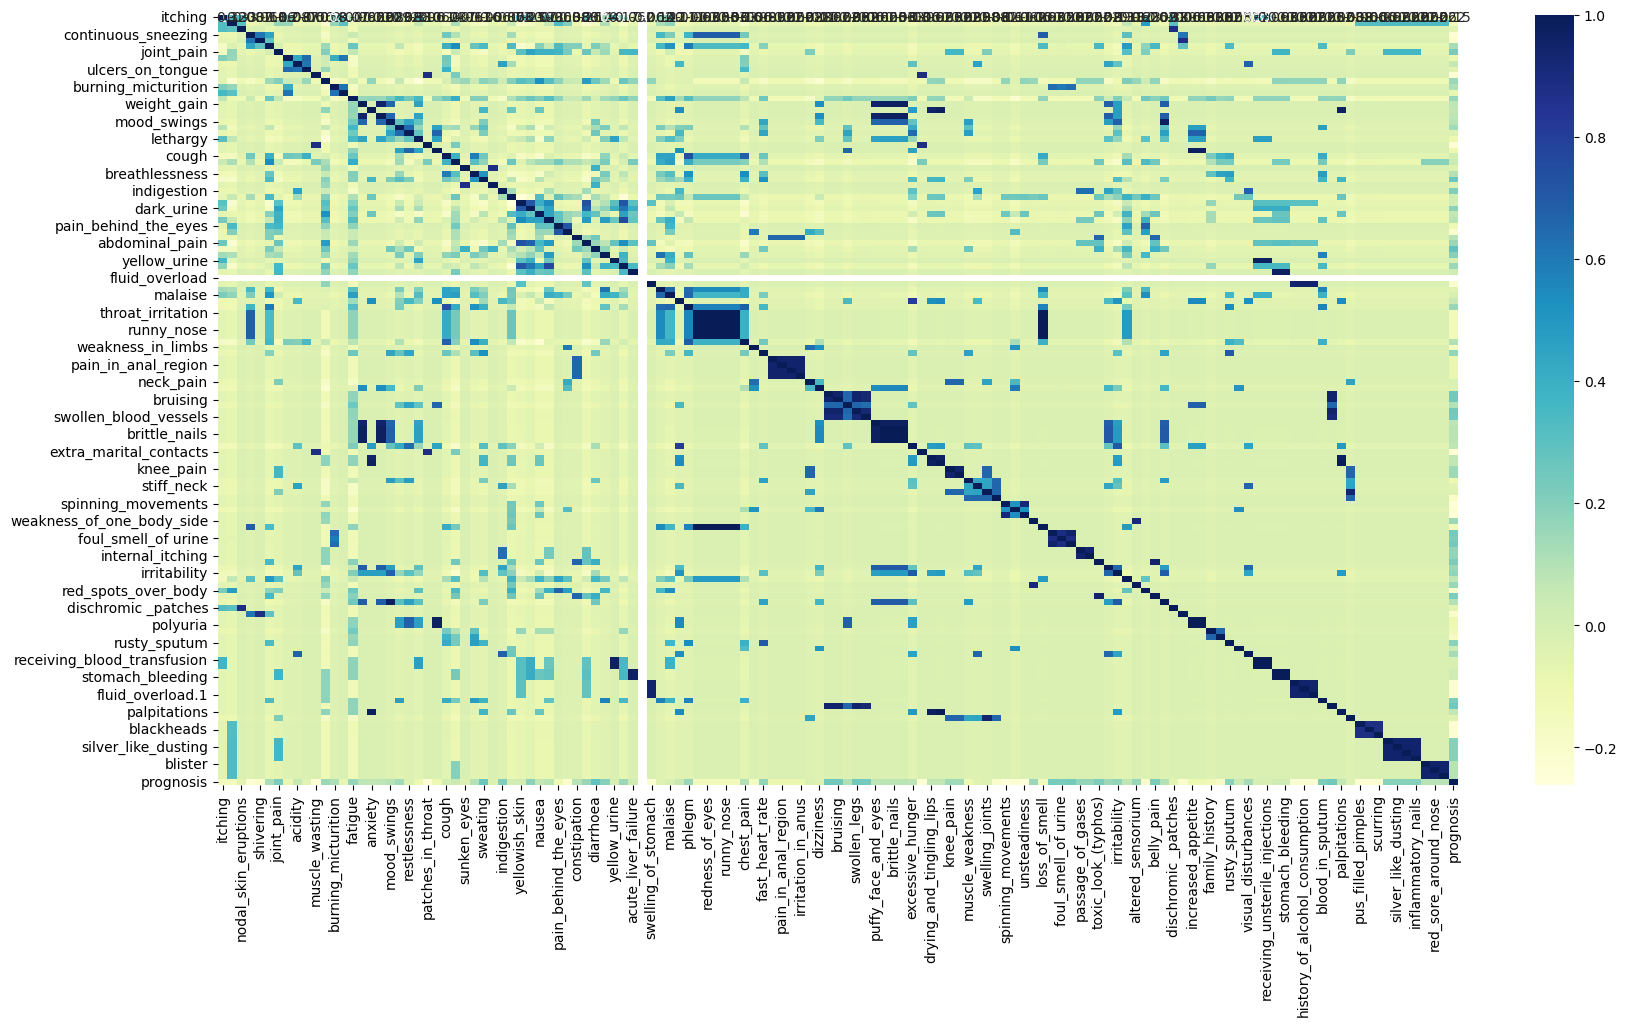

In [17]:
#heatmap

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),vmax=1.0,cmap="YlGnBu", annot=True)

In [18]:
X = df.drop('prognosis', axis=1)
y = df['prognosis']

In [19]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [20]:
y

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int32

## splitting dataset into train and test sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [22]:
X_train.shape

(3936, 132)

In [23]:
X_test.shape

(984, 132)

In [24]:
y_train.shape

(3936,)

In [25]:
y_test.shape

(984,)

## Logistic Regression model ##

In [26]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(multi_class='ovr')
lr.fit(X_train,y_train)
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train,y_train_pred_lr))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_lr))

ac_lr = accuracy_score(y_test, y_test_pred_lr)

Training Accuracy: 1.0
Testing Accuracy: 1.0


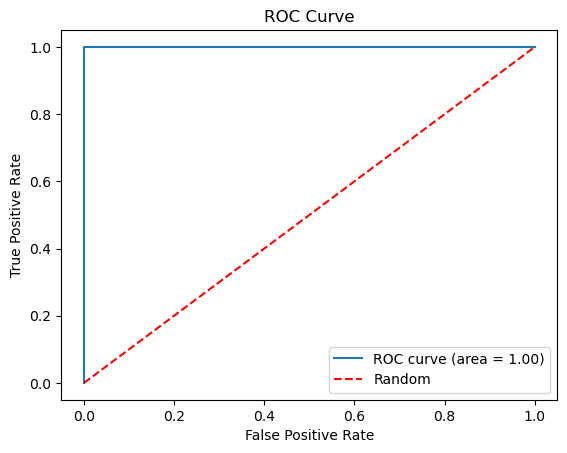

In [27]:
# Calculate ROC AUC score
roc_auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test), multi_class='ovr')

# Plot ROC curve
plt.figure()
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Decision Tree model

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=None, min_samples_split=200, min_samples_leaf=10, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
dt.fit(X_train,y_train)
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train,y_train_pred_dt))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_dt))

ac_dt = accuracy_score(y_test, y_test_pred_dt)

Training Accuracy: 0.8940548780487805
Testing Accuracy: 0.875


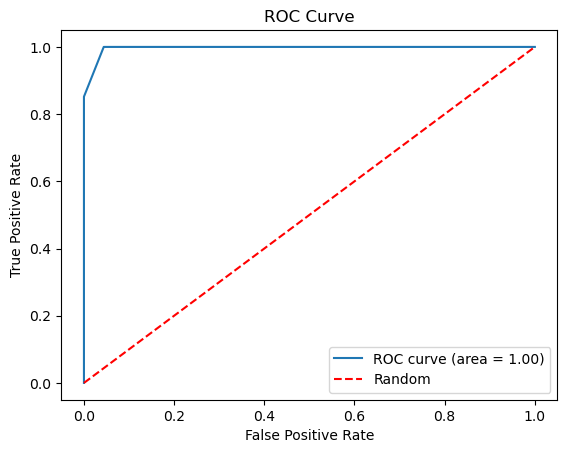

In [29]:
# Calculate ROC AUC score
roc_auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test), multi_class='ovr')

# Plot ROC curve
plt.figure()
fpr, tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest Classifier model

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_train_pred_rfc = rfc.predict(X_train)
y_test_pred_rfc = rfc.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train,y_train_pred_rfc))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_rfc))

ac_rfc = accuracy_score(y_test, y_test_pred_rfc)

Training Accuracy: 1.0
Testing Accuracy: 1.0


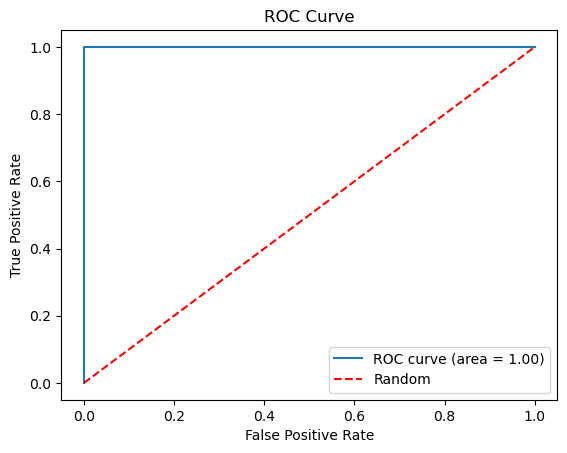

In [31]:
# Calculate ROC AUC score
roc_auc_rfc = roc_auc_score(y_test, rfc.predict_proba(X_test), multi_class='ovr')

# Plot ROC curve
plt.figure()
fpr, tpr, _ = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_rfc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Support Vector Classifier model

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score

svc=SVC(kernel='linear', probability=True)
svc.fit(X_train,y_train)
y_train_pred_svc = svc.predict(X_train)
y_test_pred_svc = svc.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train,y_train_pred_svc))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_svc))

ac_svc = accuracy_score(y_test, y_test_pred_svc)
prec_svc = precision_score(y_test, y_test_pred_svc,average = 'weighted')

Training Accuracy: 1.0
Testing Accuracy: 1.0


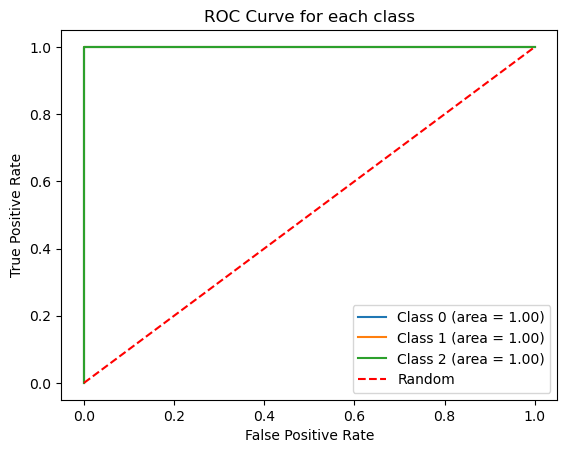

In [34]:
from sklearn.preprocessing import label_binarize

# Binarize the labels for ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40])

decision_function_scores = svc.decision_function(X_test)

roc_auc = []
for i in range(41):  # Assuming 3 classes
    roc_auc.append(roc_auc_score(y_test_bin[:, i], decision_function_scores[:, i]))

roc_auc_svc = np.mean(roc_auc)

# Plot ROC curve for each class
plt.figure()
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], decision_function_scores[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='lower right')
plt.show()


## Naive Bayes model

In [35]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

# Train the model on the training set
nb.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_nb = nb.predict(X_train)
# Make predictions on the testing set
y_test_pred_nb = nb.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_nb))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_nb))


ac_nb = accuracy_score(y_test, y_test_pred_nb)

Training Accuracy: 1.0
Testing Accuracy: 1.0


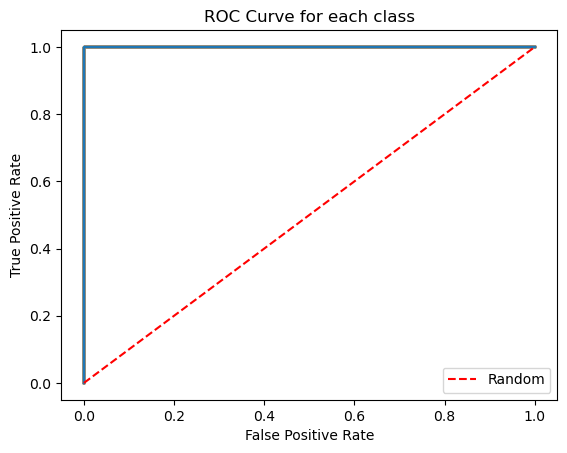

In [36]:
from sklearn.preprocessing import label_binarize

# Binarize the labels for ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40])

# Calculate predicted probabilities
y_prob = nb.predict_proba(X_test)

# Calculate ROC AUC for each class
roc_auc = []
for i in range(41):  
    roc_auc.append(roc_auc_score(y_test_bin[:, i], y_prob[:, i]))

roc_auc_nb = sum(roc_auc) / len(roc_auc)

# Plot ROC curve for each class
plt.figure()
for i in range(41):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    # plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc[i]:.2f})')
    plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='lower right')
plt.show()


## Gradient Boosting model

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Train the model on the training set
gb.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_gb = gb.predict(X_train)
# Make predictions on the testing set
y_test_pred_gb = gb.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_gb))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_gb))

ac_gb = accuracy_score(y_test, y_test_pred_gb)

Training Accuracy: 0.8816056910569106
Testing Accuracy: 0.8760162601626016


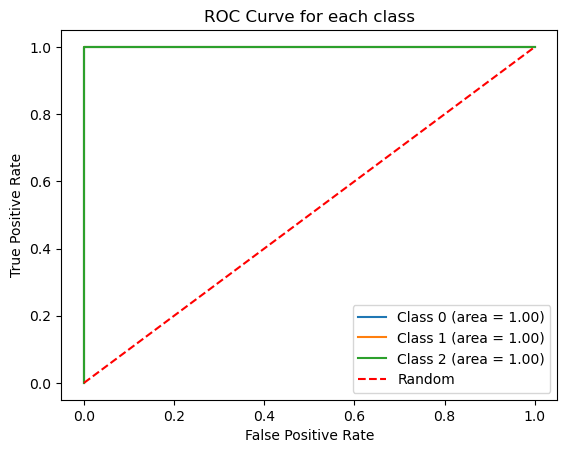

In [40]:
from sklearn.preprocessing import label_binarize

# Binarize the labels for ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40])

# Calculate predicted probabilities
y_prob = gb.predict_proba(X_test)

# Calculate ROC AUC for each class
roc_auc = []
for i in range(41):  
    roc_auc.append(roc_auc_score(y_test_bin[:, i], y_prob[:, i]))

# Calculate the average ROC AUC score
roc_auc_gb = sum(roc_auc) / len(roc_auc)

# Plot ROC curve for each class
plt.figure()
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='lower right')
plt.show()



## K-Nearest Neighbors model

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training set
knn.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_knn = knn.predict(X_train)
# Make predictions on the testing set
y_test_pred_knn = knn.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_knn))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_knn))

ac_knn = accuracy_score(y_test, y_test_pred_knn)

Training Accuracy: 1.0
Testing Accuracy: 1.0


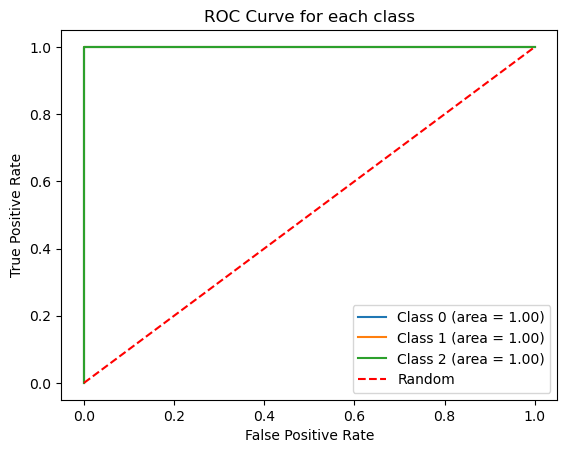

In [42]:
from sklearn.preprocessing import label_binarize

# Binarize the labels for ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40])

# Calculate decision function scores
y_score = knn.predict_proba(X_test)

# Calculate ROC AUC for each class
roc_auc = []
for i in range(41):  # Assuming 3 classes
    roc_auc.append(roc_auc_score(y_test_bin[:, i], y_score[:, i]))

# Plot ROC curve for each class
plt.figure()
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='lower right')
plt.show()

# Calculate the average ROC AUC score
roc_auc_knn = sum(roc_auc) / len(roc_auc)


## Artificial Neural Networks based model

In [67]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(18,activation='relu', input_shape=(132,),kernel_initializer='uniform'))

# Adding a Dropout layer to prevent overfitting
model.add(Dropout(0.50))
# adding a second hidden layer
model.add(Dense(60, kernel_initializer='uniform', activation='relu'))

# Adding another Dropout layer
model.add(Dropout(0.50))
# adding a third hidden layer
model.add(Dense(80, kernel_initializer='uniform', activation='relu'))

# Adding another Dropout layer
model.add(Dropout(0.50))
# adding the output layer 
model.add(Dense(41,kernel_initializer='uniform', activation='softmax'))

# Compiling the model
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Fitting the ANN to the Training set
model.fit(X_train.astype(np.float32), y_train.astype(np.float32),batch_size=28, epochs=200, verbose=2) 

#Visualizing the model
model.summary()

Epoch 1/200
141/141 - 3s - 18ms/step - accuracy: 0.0498 - loss: 3.5755
Epoch 2/200
141/141 - 0s - 1ms/step - accuracy: 0.1253 - loss: 2.8062
Epoch 3/200
141/141 - 0s - 1ms/step - accuracy: 0.2160 - loss: 2.4337
Epoch 4/200
141/141 - 0s - 1ms/step - accuracy: 0.2828 - loss: 2.1704
Epoch 5/200
141/141 - 0s - 1ms/step - accuracy: 0.3155 - loss: 2.0335
Epoch 6/200
141/141 - 0s - 1ms/step - accuracy: 0.3592 - loss: 1.9350
Epoch 7/200
141/141 - 0s - 1ms/step - accuracy: 0.3773 - loss: 1.8572
Epoch 8/200
141/141 - 0s - 1ms/step - accuracy: 0.4050 - loss: 1.7860
Epoch 9/200
141/141 - 0s - 1ms/step - accuracy: 0.4345 - loss: 1.6894
Epoch 10/200
141/141 - 0s - 1ms/step - accuracy: 0.4375 - loss: 1.6948
Epoch 11/200
141/141 - 0s - 1ms/step - accuracy: 0.4593 - loss: 1.6194
Epoch 12/200
141/141 - 0s - 1ms/step - accuracy: 0.4736 - loss: 1.5943
Epoch 13/200
141/141 - 0s - 1ms/step - accuracy: 0.4820 - loss: 1.5588
Epoch 14/200
141/141 - 0s - 1ms/step - accuracy: 0.5198 - loss: 1.4673
Epoch 15/200
1

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 18)                  │           2,394 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 60)                  │           1,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 80)                  │           4,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 41)                  │           3,321 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,207 (137.53 KB)

 Trainable params: 11,735 (45.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,472 (91.69 KB)

In [68]:
loss, accuracy = model.evaluate(X_train, y_train)
print("Train Accuracy:", accuracy)
loss, ac_ann = model.evaluate(X_test, y_test)
print("Test Accuracy:", ac_ann)

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0653
Train Accuracy: 1.0
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 1.0000 - loss: 0.0743
Test Accuracy: 1.0


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


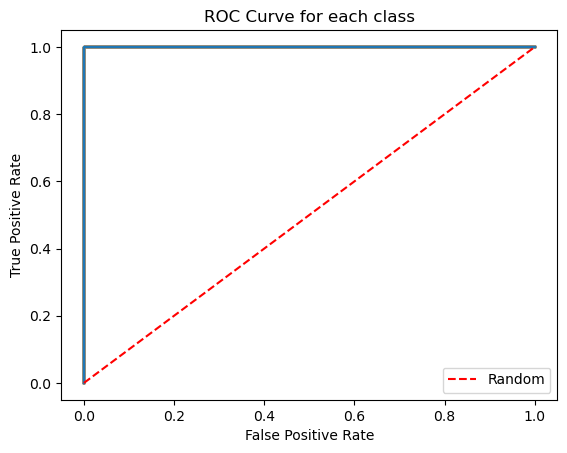

In [69]:
from sklearn.preprocessing import label_binarize

# Predict probabilities on the test set
y_prob = model.predict(X_test.astype(np.float32))

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=np.arange(41))

# Calculate ROC AUC for each class
roc_auc = []
for i in range(41):  # Assuming 41 classes
    roc_auc.append(roc_auc_score(y_test_bin[:, i], y_prob[:, i]))

# Plot ROC curve for each class
plt.figure()
for i in range(41):  # Assuming 41 classes
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr,tpr)
    # plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for each class')
plt.legend(loc='lower right')
plt.show()

# Calculate the average ROC AUC score
roc_auc_ann = sum(roc_auc) / len(roc_auc)

## Comparison of ROC scores

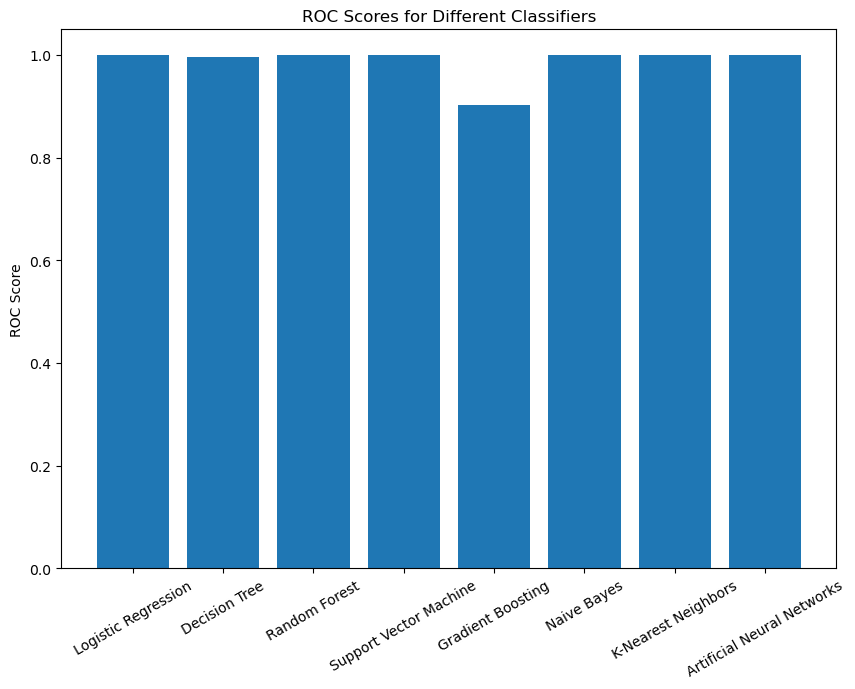

In [70]:
roc_scores = {
    'Logistic Regression':roc_auc_lr,
    'Decision Tree': roc_auc_dt,
    'Random Forest':roc_auc_rfc,
    'Support Vector Machine':roc_auc_svc,
    'Gradient Boosting':roc_auc_gb,
    'Naive Bayes':roc_auc_nb,
    'K-Nearest Neighbors':roc_auc_knn,
    'Artificial Neural Networks':roc_auc_ann
}

plt.figure(figsize=(10, 7))
plt.bar(range(len(roc_scores)), list(roc_scores.values()))
plt.xticks(range(len(roc_scores)), list(roc_scores.keys()))
plt.xticks(rotation=30)
plt.ylabel('ROC Score')
plt.title('ROC Scores for Different Classifiers')

plt.show()

## Comparison of Accuracy

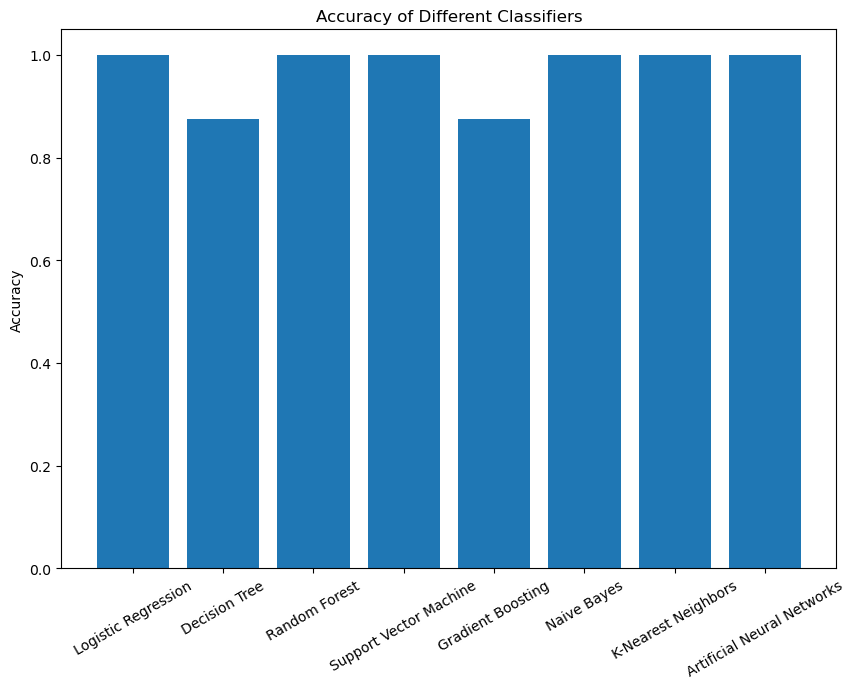

In [71]:
acc_scores = {
    'Logistic Regression':ac_lr,
    'Decision Tree': ac_dt,
    'Random Forest':ac_rfc,
    'Support Vector Machine':ac_svc,
    'Gradient Boosting':ac_gb,
    'Naive Bayes':ac_nb,
    'K-Nearest Neighbors':ac_knn,
    'Artificial Neural Networks':ac_ann
}
plt.figure(figsize=(10, 7))
plt.bar(range(len(acc_scores)), list(acc_scores.values()))
plt.xticks(range(len(acc_scores)), list(acc_scores.keys()))
plt.xticks(rotation=30)
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.show()

## Choosing SVC as the best model- Confusion matrix and Classification Report

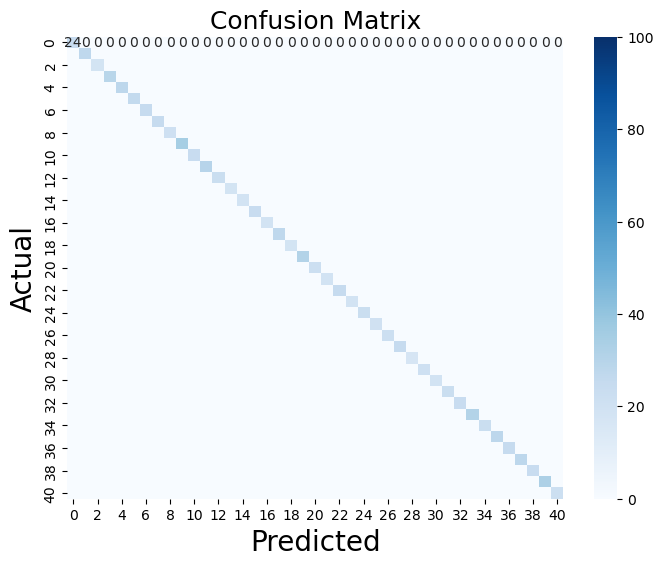

In [49]:
from sklearn.metrics import confusion_matrix #making confusion matrix for the algorithm with best accuracy

cm = confusion_matrix(y_test, y_test_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g',cmap='Blues',vmin=0, vmax=100)
plt.xlabel('Predicted', size=20)
plt.ylabel('Actual', size=20)
plt.title('Confusion Matrix', size=18)

plt.show()

In [50]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_svc))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        35
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        30
          12       1.00      1.00      1.00        23
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        19
   

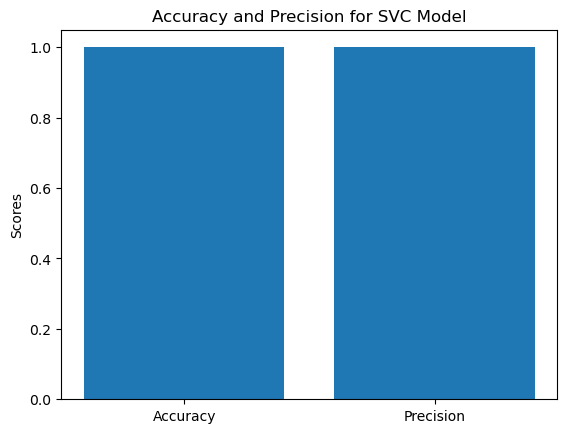

In [52]:
labels = ['Accuracy', 'Precision']
scores = [ac_svc, prec_svc]  # scores for Accuracy and Precision of the model

plt.bar(labels, scores)
plt.ylabel('Scores')
plt.title('Accuracy and Precision for SVC Model')

plt.show()

In [53]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))
print("SVC model saved successfully.")

SVC model saved successfully.


In [54]:
#loading the model
svc = pickle.load(open('svc.pkl','rb'))

## Test Predictions

In [55]:
#test 1
print("Predicted disease:", svc.predict(X_test.iloc[0].values.reshape(1, -1))[0])
print("Actual Disease:", y_test.iloc[0])

Predicted disease: 40
Actual Disease: 40


In [56]:
#test 2
print("Predicted disease:", svc.predict(X_test.iloc[100].values.reshape(1, -1))[0])
print("Actual Disease:", y_test.iloc[100])

Predicted disease: 39
Actual Disease: 39


# Recommendation system

In [57]:
sym_des = pd.read_csv("symtoms_df.csv")
precautions = pd.read_csv("precautions_df.csv")
workout = pd.read_csv("workout_df.csv")
description = pd.read_csv("description.csv")
medications = pd.read_csv('medications.csv')
diets = pd.read_csv("diets.csv")

In [58]:
#a function to print statements in bold
from IPython.display import Markdown, display

def print_bold(text):
    display(Markdown(f"**{text}**"))


In [59]:
diets.head()

,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."


In [60]:
workout.head()

,Unnamed: 0.1,Unnamed: 0,disease,workout
0,0,0,Fungal infection,Avoid sugary foods
1,1,1,Fungal infection,Consume probiotics
2,2,2,Fungal infection,Increase intake of garlic
3,3,3,Fungal infection,Include yogurt in diet
4,4,4,Fungal infection,Limit processed foods


In [61]:
precautions.head()

,Unnamed: 0,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [62]:
description.head()

,Disease,Description
0,Fungal infection,Fungal infection is a common skin condition ca...
1,Allergy,Allergy is an immune system reaction to a subs...
2,GERD,GERD (Gastroesophageal Reflux Disease) is a di...
3,Chronic cholestasis,Chronic cholestasis is a condition where bile ...
4,Drug Reaction,Drug Reaction occurs when the body reacts adve...


In [63]:
medications.head()

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."


In [64]:
sym_des.head()

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN


In [65]:
#helper function to get details about the predicted disease
def helper(dis):
    if  dis:
        desc = description[description['Disease'] == predicted_disease]['Description']
        desc = " ".join([w for w in desc])
    
        pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
        pre = [col for col in pre.values]
    
        med = medications[medications['Disease'] == dis]['Medication']
        med = [med for med in med.values]
    
        die = diets[diets['Disease'] == dis]['Diet']
        die = [die for die in die.values]
    
        wrkout = workout[workout['disease'] == dis] ['workout']
        wrkout = wrkout.values.tolist()
        
        return desc,pre,med,die,wrkout
        
    else:
        return None,[],[],[],[]



symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def predicted_value(patient_symptoms):
    if not patient_symptoms:
        return None
    n = len(symptoms_dict)
    arr = np.zeros(n)
    for item in patient_symptoms:
        arr[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([arr])[0]]

In [66]:
symptoms = []
while True:
        symptom = input("Enter a symptom (or type 'done' to finish): ").strip().lower()
        if symptom == 'done':
            break
        symptoms.append(symptom)

print_bold("Symptoms of the patient:")
if not symptoms:
    print(None,".Please enter your symptoms to be diagnosed")
else:
    print(symptoms)

predicted_disease = predicted_value(symptoms)
print_bold("Predicted Disease:")
print(predicted_disease)

desc,prec,medicine,diet,workout = helper(predicted_disease)

print_bold("Description:")
print(desc)

print_bold("Proposed Precautions:")
if prec:
    prec = pd.Series(prec).dropna().tolist()
    cnt = 1
    for i in prec[0]:
        print(cnt, ":" ,i)
        cnt+=1
else:
    print (None)

print_bold("Proposed Medications")
if medicine:
    medicine = pd.Series(medicine).dropna().tolist() #drop null values
    cnt = 1
    for i in medicine:
        print(i)
else:
    print (None)

print_bold("Proposed Diet:")
if diet:
    diet = pd.Series(diet).dropna().tolist()
    cnt = 1
    for i in diet:
        print(i)
else:
    print (None)

print_bold("Proposed Workout")
if workout:
    cnt = 1
    for i in workout:
        print(cnt, ":" ,i)
        cnt+=1
else:
    print (None)

Enter a symptom (or type 'done' to finish):  nodal_skin_eruptions
Enter a symptom (or type 'done' to finish):  skin_rash
Enter a symptom (or type 'done' to finish):  itching
Enter a symptom (or type 'done' to finish):  done


**Symptoms of the patient:**

['nodal_skin_eruptions', 'skin_rash', 'itching']


**Predicted Disease:**

Fungal infection


**Description:**

Fungal infection is a common skin condition caused by fungi.


**Proposed Precautions:**

1 : bath twice
2 : use detol or neem in bathing water
3 : keep infected area dry
4 : use clean cloths


**Proposed Medications**

['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']


**Proposed Diet:**

['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


**Proposed Workout**

1 : Avoid sugary foods
2 : Consume probiotics
3 : Increase intake of garlic
4 : Include yogurt in diet
5 : Limit processed foods
6 : Stay hydrated
7 : Consume green tea
8 : Eat foods rich in zinc
9 : Include turmeric in diet
10 : Eat fruits and vegetables
